# Different Techniques to handle Categorical Missing Values

## 1. Frequent Category Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house.csv", usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [3]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

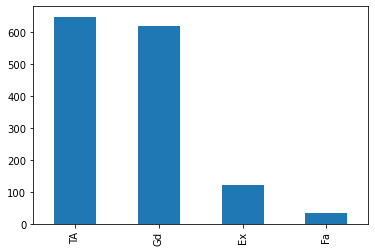

In [6]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='GarageType'>

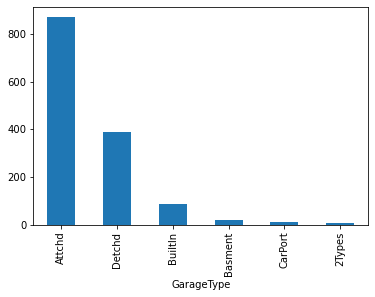

In [9]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

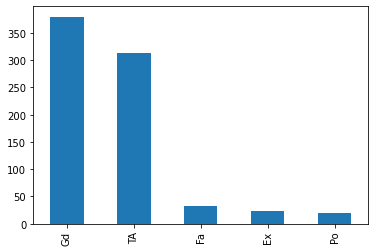

In [10]:
df['FireplaceQu'].value_counts().plot.bar()

In [16]:
df['FireplaceQu'].mode()[0]

'Gd'

In [17]:
def impute_nan(df,variable):
    most_freq = df[variable].mode()[0]
    df[variable].fillna(most_freq, inplace = True)

In [18]:
for f in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,f)

In [19]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## 2. Capturing the importance of NaN values in a new feature 

In [20]:
df = pd.read_csv("house.csv", usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [21]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [24]:
def impute_nan(df,variable):
    df[variable+"_nan"] = np.where(df[variable].isnull(),1,0)
    df[variable] = df[variable].fillna(df[variable].mode()[0])

In [25]:
for f in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,f)

In [27]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan,GarageType_nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
5,Gd,Gd,Attchd,143000,0,1,0
6,Ex,Gd,Attchd,307000,0,0,0
7,Gd,TA,Attchd,200000,0,0,0
8,TA,TA,Detchd,129900,0,0,0
9,TA,TA,Attchd,118000,0,0,0


## 3. Make NAN a new category

In [28]:
df = pd.read_csv("house.csv", usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [29]:
df['BsmtQual'].fillna("Missing",inplace = True)

In [30]:
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [31]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [33]:
df.BsmtQual.value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual, dtype: int64